In [1]:
from collections import Counter
from itertools import combinations
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = [
    [4, 27, 23, 36, 13, 1],
    [19, 30, 12, 8, 3, 17],
    [35, 28, 4, 20, 1, 25],
    [23, 32, 16, 11, 31, 4],
    [9, 3, 18, 11, 33, 27],
    [19, 3, 36, 5, 28, 18],
    [7, 36, 19, 27, 37, 31],
    [4, 18, 14, 5, 29, 28],
    [8, 33, 9, 36, 23, 1],
    [28, 31, 1, 11, 10, 38],
    [30, 14, 38, 36, 31, 7],
    [33, 18, 29, 12, 7, 10],
    [35, 11, 7, 19, 16, 1],
    [26, 10, 17, 4, 25, 8],
    [28, 7, 5, 2, 33, 3],
    [2, 33, 1, 17, 8, 5],
    [7, 26, 10, 15, 3, 25],
    [7, 6, 5, 1, 21, 19],
    [21, 3, 7, 27, 18, 4],
    [30, 13, 14, 25, 3, 2],
    [29, 17, 25, 19, 27, 2],
    [22, 14, 25, 6, 8, 29],
    [36, 14, 3, 30, 2, 12],
    [8, 16, 20, 21, 6, 27],
    [7, 18, 14, 4, 21, 9],
    [34, 8, 7, 21, 13, 10],
    [2, 32, 36, 34, 10, 20],
    [9, 12, 33, 19, 25, 36],
    [5, 4, 11, 15, 7, 20],
    [16, 37, 13, 29, 32, 2],
    [1, 19, 3, 31, 9, 28],
    [26, 22, 15, 37, 28, 23],
    [35, 14, 29, 27, 26, 30],
    [11, 36, 2, 17, 24, 6],
]

In [3]:
last_loto = [21, 3, 7, 27, 18, 4]

### Metodos

In [4]:
def contar_coincidencias(array1, array2):
    # Utilizar Counter para contar las ocurrencias de cada número en cada array
    counter1 = Counter(array1)
    counter2 = Counter(array2)

    # Encontrar la intersección de los conjuntos de elementos
    elementos_comunes = list((counter1 & counter2).elements())

    # Contar la cantidad de coincidencias para cada elemento
    cantidad_coincidencias = [min(counter1[num], counter2[num]) for num in elementos_comunes]

    # Crear una lista que contenga cada elemento repetido la cantidad correcta de veces
    coincidencias = [num for num, count in zip(elementos_comunes, cantidad_coincidencias) for _ in range(count)]

    print(f"Hubo coincidencia con {len(coincidencias)} números: {coincidencias}")
    
    # Retornar las coincidencias
    return coincidencias

## Analisis Generales de la data

### Analizar cantidad de veces que ah jugado un numero

In [5]:
# Convertir la lista de listas a una lista plana
flat_data = [num for sublist in data for num in sublist]

# Contar la frecuencia de cada número
counter = Counter(flat_data)

# Encontrar los números que más se repiten
most_common_numbers = counter.most_common()

# Calcular el total de elementos en la lista plana
total_elements = len(flat_data)

# Imprimir los resultados con porcentajes
print("Números que más se repiten:")
for num, count in most_common_numbers:
    percentage = (count / total_elements) * 100
    print(f"{num}: {count} veces ({percentage:.2f}%)")

Números que más se repiten:
7: 11 veces (5.39%)
36: 9 veces (4.41%)
3: 9 veces (4.41%)
4: 8 veces (3.92%)
1: 8 veces (3.92%)
19: 8 veces (3.92%)
2: 8 veces (3.92%)
27: 7 veces (3.43%)
8: 7 veces (3.43%)
28: 7 veces (3.43%)
25: 7 veces (3.43%)
14: 7 veces (3.43%)
11: 6 veces (2.94%)
18: 6 veces (2.94%)
33: 6 veces (2.94%)
5: 6 veces (2.94%)
29: 6 veces (2.94%)
10: 6 veces (2.94%)
30: 5 veces (2.45%)
17: 5 veces (2.45%)
31: 5 veces (2.45%)
9: 5 veces (2.45%)
21: 5 veces (2.45%)
23: 4 veces (1.96%)
13: 4 veces (1.96%)
12: 4 veces (1.96%)
20: 4 veces (1.96%)
16: 4 veces (1.96%)
26: 4 veces (1.96%)
6: 4 veces (1.96%)
35: 3 veces (1.47%)
32: 3 veces (1.47%)
37: 3 veces (1.47%)
15: 3 veces (1.47%)
38: 2 veces (0.98%)
22: 2 veces (0.98%)
34: 2 veces (0.98%)
24: 1 veces (0.49%)


### Probabilidad de que aparezca un numero basandonos en todos los numeros que han jugado (juntos)

In [6]:
# Convertir la lista de listas a una lista plana
flat_data = [num for sublist in data for num in sublist]

# Contar la frecuencia de cada número
counter = Counter(flat_data)

# Calcular el total de elementos en la lista plana
total_elements = len(flat_data)

# Crear un conjunto de números del 1 al 38
all_numbers = set(range(1, 39))

# Calcular la probabilidad de que aparezca cada número
probabilities = {num: (counter[num] / total_elements) for num in all_numbers}

# Imprimir los resultados con probabilidades
print("Probabilidades de que aparezca cada número:")
for num in all_numbers:
    probability = probabilities[num] if num in counter else 0
    print(f"{num}: {probability:.4f}")

Probabilidades de que aparezca cada número:
1: 0.0392
2: 0.0392
3: 0.0441
4: 0.0392
5: 0.0294
6: 0.0196
7: 0.0539
8: 0.0343
9: 0.0245
10: 0.0294
11: 0.0294
12: 0.0196
13: 0.0196
14: 0.0343
15: 0.0147
16: 0.0196
17: 0.0245
18: 0.0294
19: 0.0392
20: 0.0196
21: 0.0245
22: 0.0098
23: 0.0196
24: 0.0049
25: 0.0343
26: 0.0196
27: 0.0343
28: 0.0343
29: 0.0294
30: 0.0245
31: 0.0245
32: 0.0147
33: 0.0294
34: 0.0098
35: 0.0147
36: 0.0441
37: 0.0147
38: 0.0098


### Total de combinaciones posibles para ganar

In [7]:
# Crear un conjunto de números del 1 al 38
all_numbers = set(range(1, 39))

# Generar todas las combinaciones de 6 números
combinations_6 = list(combinations(all_numbers, 6))

# Contar cuántas combinaciones hay
total_combinations = len(combinations_6)

# Imprimir el resultado
print(f"Total de combinaciones de 6 números del 1 al 38: {total_combinations}")


Total de combinaciones de 6 números del 1 al 38: 2760681


### Calcular la probabilidad en porcentaje

In [8]:

# Calcular la probabilidad en porcentaje
probability_percentage = (1 / total_combinations) * 100

# Imprimir el resultado
print(f"La probabilidad en porcentaje es aproximadamente: {probability_percentage:.6f}%")

La probabilidad en porcentaje es aproximadamente: 0.000036%


### Buscar numeros que ya jugaron

In [9]:
# Crear un conjunto de números del 1 al 38
all_numbers = set(range(1, 39))

# Inicializar una lista para almacenar los números encontrados en cada iteración
found_numbers = []

# Bucle para recorrer cada arreglo
for i, arr in enumerate(data):
    # Agregar los números del arreglo actual a la lista de encontrados
    found_numbers.extend(arr)
    # Obtener el conjunto único de números encontrados hasta el momento
    unique_found_numbers = set(found_numbers)
    # Verificar si se han encontrado todos los números del 1 al 38
    if unique_found_numbers == all_numbers:
        print(f"Todos los números del 1 al 38 fueron encontrados en la iteración {i + 1}")
        break

Todos los números del 1 al 38 fueron encontrados en la iteración 34


In [10]:
# Conjunto para almacenar los números encontrados
numeros_encontrados = set()

# Variable para llevar el conteo de los bucles
bucle_actual = 0

# Recorrer los datos
for lista_numeros in data:
    bucle_actual += 1
    numeros_encontrados.update(lista_numeros)

    # Verificar si todos los números del 1 al 38 están presentes
    if set(range(1, 39)).issubset(numeros_encontrados):
        print(f"¡Todos los números del 1 al 38 están presentes en el bucle {bucle_actual}!")
        break
else:
    numeros_faltantes = set(range(1, 39)) - numeros_encontrados
    print(f"No se encontraron todos los números del 1 al 38 en los datos proporcionados.")
    print(f"Números encontrados: {numeros_encontrados}")
    print(f"Números faltantes: {numeros_faltantes}")

¡Todos los números del 1 al 38 están presentes en el bucle 34!


## Analisis de Desviacion Estandar

### Calcular la desviación estándar para cada conjunto

In [11]:
# Calcular la desviación estándar para cada conjunto
desviaciones_estandar = [np.std(sublista) for sublista in data]

# Imprimir resultados
for i, desviacion in enumerate(desviaciones_estandar, start=1):
    desviacion_redondeada = round(desviacion, 2)
    print(f"Bucle {i}: Desviación estándar = {desviacion:.2f}")
    # Almacenar en la lista después de imprimir
    desviaciones_estandar[i-1] = desviacion_redondeada

Bucle 1: Desviación estándar = 12.50
Bucle 2: Desviación estándar = 8.63
Bucle 3: Desviación estándar = 12.40
Bucle 4: Desviación estándar = 10.21
Bucle 5: Desviación estándar = 10.43
Bucle 6: Desviación estándar = 11.68
Bucle 7: Desviación estándar = 10.46
Bucle 8: Desviación estándar = 9.88
Bucle 9: Desviación estándar = 13.19
Bucle 10: Desviación estándar = 13.23
Bucle 11: Desviación estándar = 11.47
Bucle 12: Desviación estándar = 9.72
Bucle 13: Desviación estándar = 10.75
Bucle 14: Desviación estándar = 8.37
Bucle 15: Desviación estándar = 12.56
Bucle 16: Desviación estándar = 11.15
Bucle 17: Desviación estándar = 8.67
Bucle 18: Desviación estándar = 7.45
Bucle 19: Desviación estándar = 9.14
Bucle 20: Desviación estándar = 10.34
Bucle 21: Desviación estándar = 9.03
Bucle 22: Desviación estándar = 8.60
Bucle 23: Desviación estándar = 12.79
Bucle 24: Desviación estándar = 7.36
Bucle 25: Desviación estándar = 6.04
Bucle 26: Desviación estándar = 9.46
Bucle 27: Desviación estándar = 1

### Promedio de la desviacion estandar

In [12]:
# IMPORTANTE  Necesitas la desviacion anterior para ejecutar este codigo
# Calcular el promedio de las desviaciones estándar
promedio_desviaciones = sum(desviaciones_estandar) / len(desviaciones_estandar)

# Imprimir el resultado
print(f"El promedio de las desviaciones estándar es: {promedio_desviaciones:.2f}")

El promedio de las desviaciones estándar es: 10.07


### Grafica de desviacion Estandar por sorteo

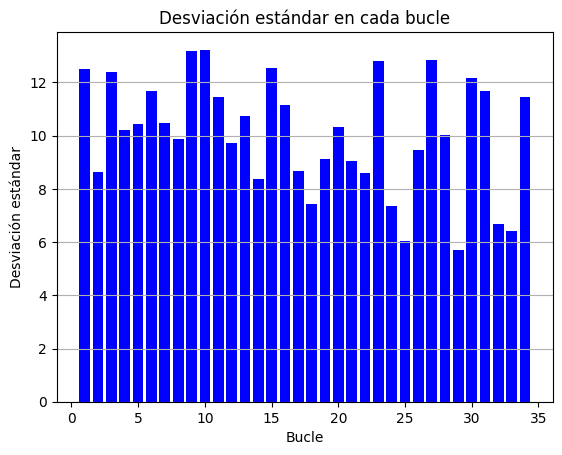

In [13]:
# Desviaciones estándar proporcionadas
# Índices para los bucles
bucles = list(range(1, len(desviaciones_estandar) + 1))

# Crear el gráfico de barras
plt.bar(bucles, desviaciones_estandar, color='blue')
plt.xlabel('Bucle')
plt.ylabel('Desviación estándar')
plt.title('Desviación estándar en cada bucle')
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

# Generador de numeros utilizando desviacion

In [14]:
# Probabilidades proporcionadas
probabilidades = probabilities

# Número de conjuntos a generar
num_conjuntos = 1000

# Lista para almacenar los conjuntos generados
conjuntos_generados = []

# Generar conjuntos basados en las probabilidades
for _ in range(num_conjuntos):
    # Ordenar las claves por ponderación de mayor a menor
    claves_ordenadas = sorted(probabilidades, key=probabilidades.get, reverse=True)
    
    # Seleccionar 6 elementos sin reemplazo
    conjunto = random.sample(claves_ordenadas, k=6)
    
    # Agregar el conjunto a la lista
    conjuntos_generados.append(conjunto)

# Calcular la desviación estándar de cada conjunto
desviaciones_estandar_generadas = [np.std(conjunto) for conjunto in conjuntos_generados]

# Convertir la lista a un array de NumPy antes de realizar la resta
desviaciones_estandar_generadas = np.array(desviaciones_estandar_generadas)

# Encontrar el conjunto con desviación estándar más cercana a la observada
indice_min_desviacion = np.argmin(np.abs(desviaciones_estandar_generadas - 9.15))
conjunto_seleccionado = conjuntos_generados[indice_min_desviacion]

# Imprimir resultados
print("Conjunto seleccionado:", conjunto_seleccionado)
print("Desviación estándar del conjunto seleccionado:", desviaciones_estandar_generadas[indice_min_desviacion])


Conjunto seleccionado: [5, 3, 24, 28, 15, 18]
Desviación estándar del conjunto seleccionado: 9.142392101268317


In [15]:
contar_coincidencias(conjunto_seleccionado, last_loto)

Hubo coincidencia con 2 números: [3, 18]


[3, 18]

# Simuladores de Loto

## Simulador Generico (Version sin revizar)

In [16]:

def generar_conjuntos(probabilidades, num_conjuntos):
    conjuntos_generados = []

    for _ in range(num_conjuntos):
        conjunto = random.choices(list(probabilidades.keys()), weights=list(probabilidades.values()), k=6)
        conjuntos_generados.append(conjunto)

    return conjuntos_generados

def encontrar_conjunto_deseado(probabilidades, last_loto):
    conjuntos_generados = []
    iteracion = 0

    while True:
        conjunto = random.choices(list(probabilidades.keys()), weights=list(probabilidades.values()), k=6)
        conjuntos_generados.append(conjunto)

        desviacion_estandar_generada = np.std(conjunto)

        if set(conjunto) == set(last_loto):
            print(f"Se encontró una coincidencia en la iteración {iteracion + 1}")
            break

        if iteracion % 100 == 0:
            print(f"Iteración {iteracion + 1}: Desviación estándar = {desviacion_estandar_generada}")

        iteracion += 1

    conjunto_seleccionado = conjuntos_generados[-1]

    print("Conjunto seleccionado:", conjunto_seleccionado)
    print("Desviación estándar del conjunto seleccionado:", desviacion_estandar_generada)
    contar_coincidencias(conjunto_seleccionado, last_loto)


# Encontrar conjunto deseado
encontrar_conjunto_deseado(probabilidades, last_loto)

Iteración 1: Desviación estándar = 8.098353742170895
Iteración 101: Desviación estándar = 6.994045086119096
Iteración 201: Desviación estándar = 9.878427675158296
Iteración 301: Desviación estándar = 12.433154601038842
Iteración 401: Desviación estándar = 10.434983894999018
Iteración 501: Desviación estándar = 6.082762530298219
Iteración 601: Desviación estándar = 7.945998294040145
Iteración 701: Desviación estándar = 9.044642367476756
Iteración 801: Desviación estándar = 8.900686615212459
Iteración 901: Desviación estándar = 12.6414222125343
Iteración 1001: Desviación estándar = 9.291573243177568
Iteración 1101: Desviación estándar = 10.843584893075414
Iteración 1201: Desviación estándar = 9.007712744581108
Iteración 1301: Desviación estándar = 6.0461190490723515
Iteración 1401: Desviación estándar = 8.976822006330154
Iteración 1501: Desviación estándar = 10.192589900947103
Iteración 1601: Desviación estándar = 10.688779163215974
Iteración 1701: Desviación estándar = 9.081421817216851

## Simulador con dispercion (Version desactualizada y esta valindando que el random coincida 4 numero)

In [17]:
# Número de conjuntos a generar
num_conjuntos = 1000

# Variable para almacenar el índice de la coincidencia
indice_coincidencia = None

# Contador de bucles
iteracion = 0

while indice_coincidencia is None:
    iteracion += 1
    # Generar conjuntos basados en las probabilidades
    conjuntos_generados = []
    for _ in range(num_conjuntos):
        # Ordenar las claves por ponderación de mayor a menor
        claves_ordenadas = sorted(probabilidades, key=probabilidades.get, reverse=True)
        
        # Seleccionar 6 elementos sin reemplazo
        conjunto = random.sample(claves_ordenadas, k=6)
        
        # Agregar el conjunto a la lista
        conjuntos_generados.append(conjunto)

    # Calcular la desviación estándar de cada conjunto
    desviaciones_estandar_generadas = [np.std(conjunto) for conjunto in conjuntos_generados]

    # Convertir la lista a un array de NumPy antes de realizar la resta
    desviaciones_estandar_generadas = np.array(desviaciones_estandar_generadas)

    # Encontrar el conjunto con desviación estándar más cercana a la observada
    indice_min_desviacion = np.argmin(np.abs(desviaciones_estandar_generadas - 9.14))
    conjunto_seleccionado = conjuntos_generados[indice_min_desviacion]
    
     # Calcular la desviación estándar del conjunto seleccionado
    desviacion_estandar_seleccionada = np.std(conjunto_seleccionado)
    
    # Imprimir resultados
    print("Conjunto seleccionado:", conjunto_seleccionado)
    print(f"Iteración {iteracion}: Desviación estándar = {desviacion_estandar_seleccionada}")

    # Verificar la coincidencia y almacenar el índice si es igual
    coincidencias = contar_coincidencias(conjunto_seleccionado, last_loto)
    if len(coincidencias) >= 4:
        break

print(f"La coincidencia de 6 datos después de {iteracion} bucles.")

Conjunto seleccionado: [2, 28, 16, 15, 7, 25]
Iteración 1: Desviación estándar = 9.142392101268317
Hubo coincidencia con 1 números: [7]
Conjunto seleccionado: [17, 19, 21, 12, 33, 38]
Iteración 2: Desviación estándar = 9.140872800534726
Hubo coincidencia con 1 números: [21]
Conjunto seleccionado: [29, 14, 17, 11, 1, 4]
Iteración 3: Desviación estándar = 9.140872800534726
Hubo coincidencia con 1 números: [4]
Conjunto seleccionado: [35, 6, 18, 14, 24, 25]
Iteración 4: Desviación estándar = 9.140872800534726
Hubo coincidencia con 1 números: [18]
Conjunto seleccionado: [29, 34, 19, 31, 7, 20]
Iteración 5: Desviación estándar = 9.140872800534725
Hubo coincidencia con 1 números: [7]
Conjunto seleccionado: [33, 36, 38, 15, 16, 27]
Iteración 6: Desviación estándar = 9.142392101268317
Hubo coincidencia con 1 números: [27]
Conjunto seleccionado: [31, 15, 3, 28, 18, 17]
Iteración 7: Desviación estándar = 9.140872800534726
Hubo coincidencia con 2 números: [3, 18]
Conjunto seleccionado: [9, 19, 1, 